# The Spark Foundation 
# Data Science and Business Analytics (GRIP June21)
# Task 1 : Prediction using supervised ML
# Intern : Priyankshu Kumar Sarkar


**Problem statement : What will be predicted score if a student studies for 9.25 hrs/ day?**

**Imorting python libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

%matplotlib inline

**Read the given data**

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("your required data is imported successfully")

your required data is imported successfully


In [ ]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**finding the number of rows and column** 

In [ ]:
data.shape

(25, 2)

**whole detail regarding the data :**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Checking for Null Values** :

In [ ]:
data.isnull == True

False

**Data Visualization :**

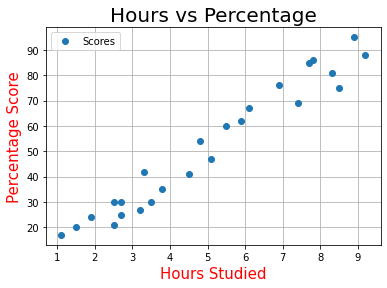

In [ ]:
#Plotting the distribution of scores
data.plot(x='Hours' , y='Scores', style='o')
plt.title('Hours vs Percentage', color='black', size = 20)
plt.xlabel('Hours Studied', color='red', size = 15)
plt.ylabel('Percentage Score', color='red', size= 15)
plt.grid(True)
plt.show()

**Preparation of Data :**

In [ ]:
x= data.iloc[: , :-1].values    
y= data.iloc[: , 1].values

**Training the model :**

**1)Spliting data into training and test sets by using Scikit-Learn's built-in train_test_split() method**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state=0)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(20, 1) (5, 1) (20,) (5,)


We can see that  20 examples were allocated to the training set and 5 examples were allocated to the test set, as we specified.

**2) Fitting data into the model :**

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)
print("model training complete")

model training complete


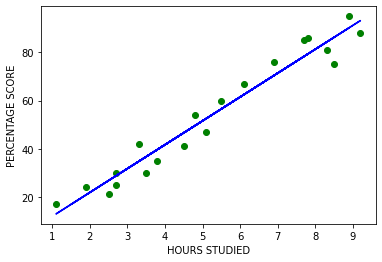

In [ ]:
#plotting the regression line 
line = regressor.coef_*x+regressor.intercept_

#plotting for the test data 
plt.scatter(x_train, y_train , color="green")
plt.plot(x , line , color ="blue");
plt.xlabel("HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORE")
plt.show()



**3)Predicting the percentage of marks**

In [14]:
print(x_test)
predict_y= regressor.predict(x_test)
predict_y

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Compare Actual vs Predicted Marks**

In [15]:
compare = pd.DataFrame({'Actual Marks':y_test ,'Predicted Marks': predict_y})
compare

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visualize the Predicted and Actual Values**

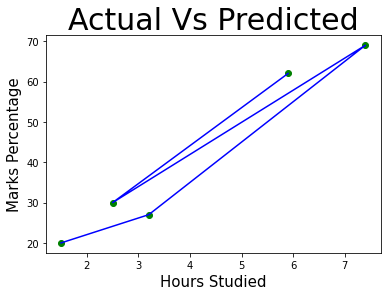

In [16]:
plt.scatter(x=x_test , y=y_test , color='green')
plt.plot(x_test , y_test , color="blue")
plt.title('Actual Vs Predicted', size=30)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

**Solution of Problem Statement**

In [17]:
hours = 9.25
print("Number of hours={}".format(hours))
print("Percentage scored: ")
print(regressor.predict([[hours]]))

Number of hours=9.25
Percentage scored: 
[93.69173249]


***Therefore from above prediction , the predicted score is 93.69173249 if a person studies for 9.25 hours***


**Evaluating the Model**

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, predict_y)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 2.0454485813637513


*** Conclusion:***

Therefore, According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks
